In [ ]:
# import libraries
!pip install --upgrade xlrd
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
import warnings
warnings.filterwarnings("ignore")
from sklearn.preprocessing import StandardScaler

# Q1 Decision Tree classifier

In [ ]:
# read the data from csv file
df1 = pd.read_csv("heart.csv")
df1.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [ ]:
# check the shape of dataset
df1.shape

(1025, 14)

In [ ]:
# check datatype of each columns
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [ ]:
# check for null values
df1.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [ ]:
# check for duplicate values
df1.duplicated().sum()

## Observation
## Dataset have almost 70% duplicate rows

723

In [ ]:
# drop duplicate rows
df1 = df1.drop_duplicates(keep='first')
df1.shape

(302, 14)

## EDA

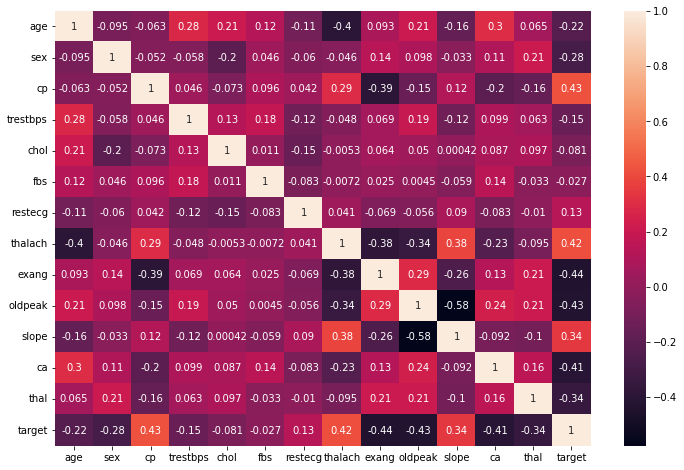

In [ ]:
# heatmap for finding correlation amongs features
plt.figure(figsize=(12, 8))
sns.heatmap(df1.corr(), annot=True)

## Observations

## feature oldpeak and slope both are negatively correlated
## feature cp and target are positively correlated
## there is not high correlation between features so we can drop that feature

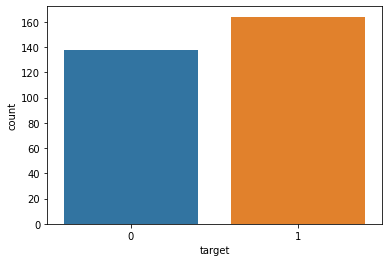

In [ ]:
# Count plot of target feature
sns.countplot(df1.target)
plt.show()


## Observation
## Dataset is almost balanced

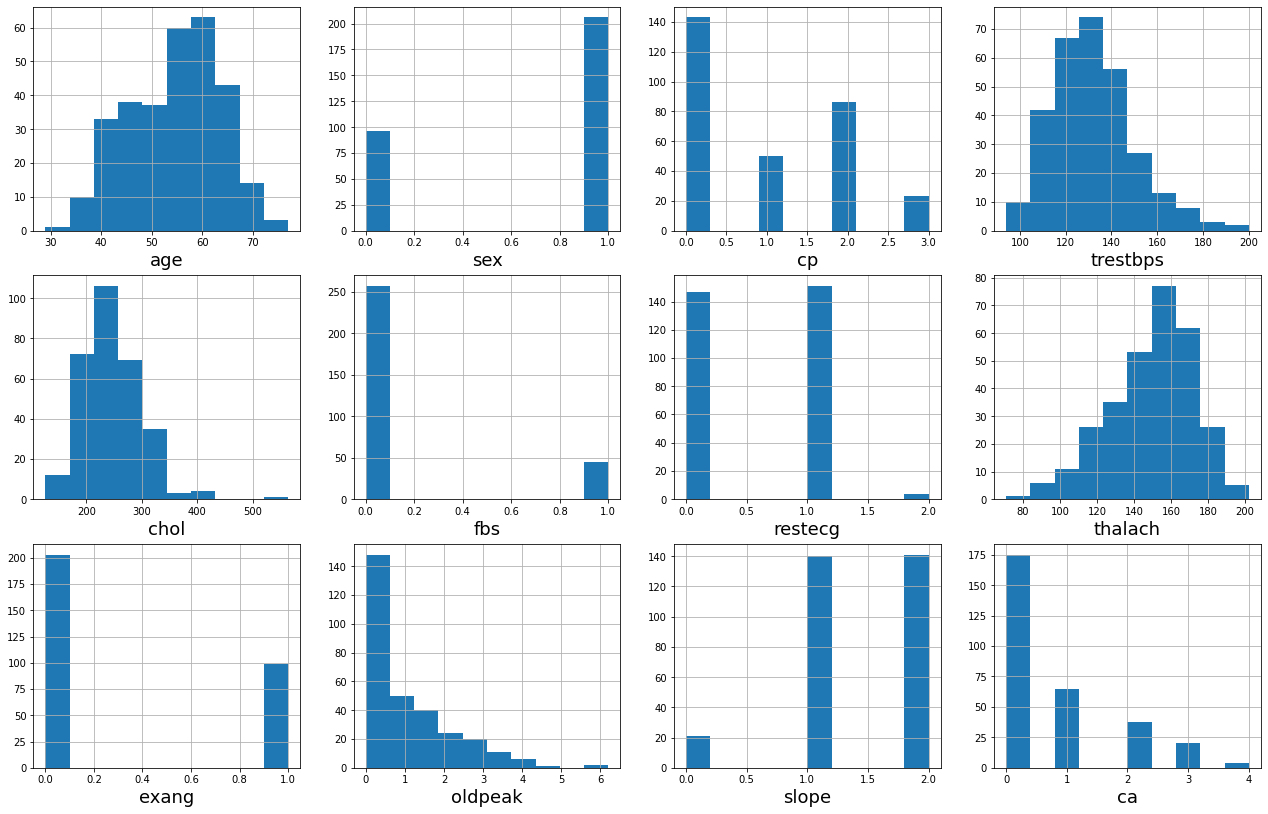

In [ ]:
# histogram of features
fig, axes = plt.subplots(3, 4, figsize=(22, 14))
axes = axes.ravel()
for i, col in enumerate(df1.columns[:-2]):
  df1[col].hist(ax=axes[i], label=[col])
  axes[i].set_xlabel(col, fontsize=18)


## Preprocess dataset

In [ ]:
# split the data into train and test
from sklearn.model_selection import train_test_split

X = df1.iloc[:, :-1]
y = df1.iloc[:, -1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=31)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(241, 13)
(61, 13)
(241,)
(61,)


## Train Decision Tree using Gini Index and Entropy

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# create two models
model1 = DecisionTreeClassifier(criterion='gini')
model2 = DecisionTreeClassifier(criterion='entropy')


# train both models
model1.fit(X_train, y_train)
model2.fit(X_train, y_train)


# test both model
y_pred1 = model1.predict(X_test)
y_pred2 = model2.predict(X_test)


# print accuacy score of both models
print("Gini index based model accuracy is :", accuracy_score(y_test, y_pred1))
print("Entropy based model accuracy is :", accuracy_score(y_test, y_pred2))

## Observations
## Gini index based Decision Tree model gives better accuracy

Gini index based model accuracy is : 0.7049180327868853
Entropy based model accuracy is : 0.6885245901639344


## Visualize Decision Tree

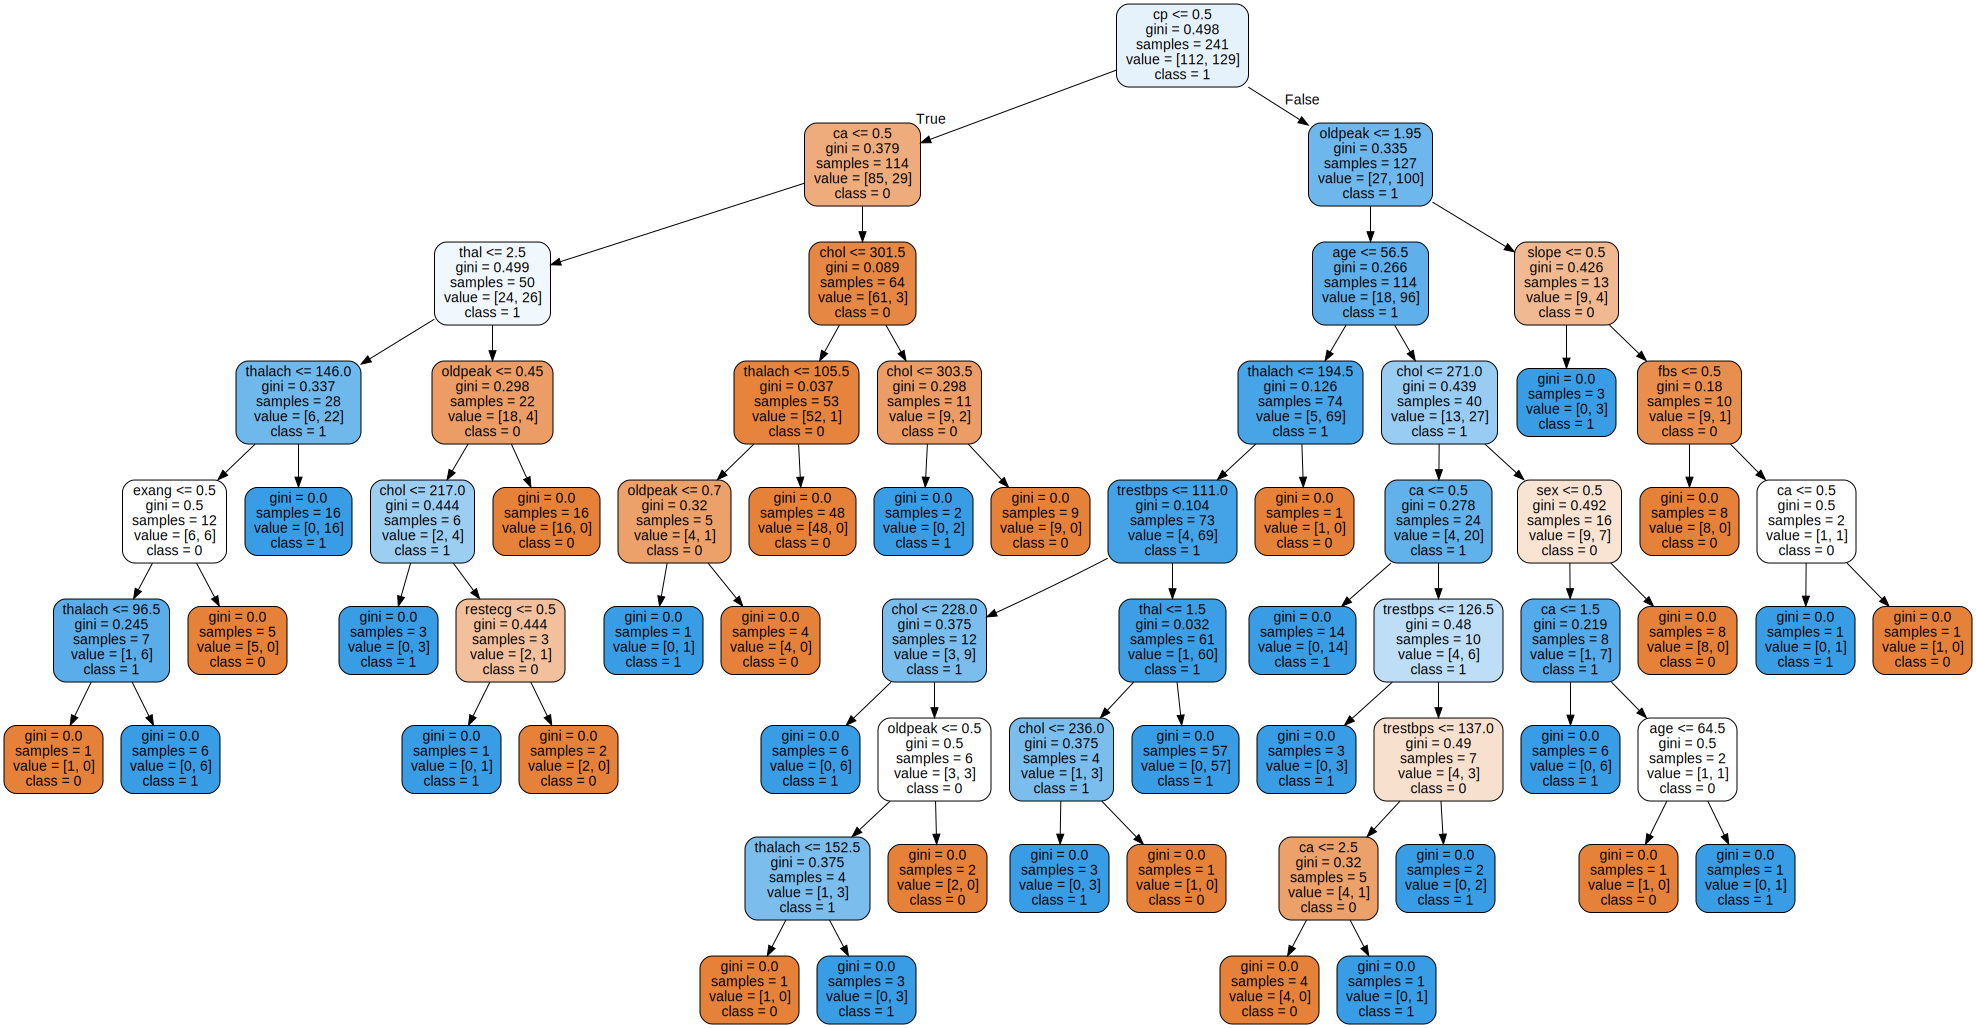

In [ ]:
import graphviz
from sklearn import tree
import pydotplus

dot_data =  tree.export_graphviz(model1, feature_names=df1.columns[:-1], class_names=['0', '1'], filled=True, rounded=True)
graph = graphviz.Source(dot_data)
graph

# Train decision tree with different values of the minimum number of samples

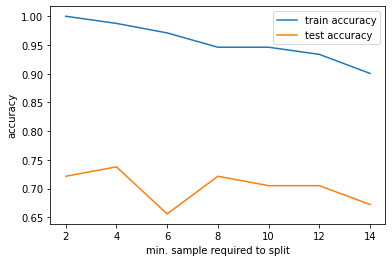

In [ ]:
# set min. sample size
min_samples_split_list = [2, 4, 6, 8, 10, 12 ,14]
train_acc = []
test_acc = []


# train and test for each value of  min sample size
for x in min_samples_split_list:
  model = DecisionTreeClassifier(min_samples_split=x)
  model.fit(X_train, y_train)
  y_pred1 = model.predict(X_train)
  y_pred2 = model.predict(X_test)
  train_acc.append(accuracy_score(y_train, y_pred1))
  test_acc.append(accuracy_score(y_test, y_pred2))


# plot the train and test accuracy
plt.plot(min_samples_split_list, train_acc, label='train accuracy')
plt.plot(min_samples_split_list, test_acc, label='test accuracy')
plt.xlabel('min. sample required to split')
plt.ylabel("accuracy")
plt.legend()
plt.show()


## Observation 

## as min. no. of sample to split at internal node increases my model starts underfiting on train data
## because of high bias in model test data is not generalizing at all.

# Q2 Random forest Classifier

### Read and Preprocess the Dataset

In [ ]:
# read the data from excel file
df = pd.read_excel("default of credit card clients.xls", index_col=None, header=1)
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [ ]:
df.info()

In [ ]:
# check for null values
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [ ]:
# check for duplicate
df.duplicated().sum()

0

In [ ]:
# Scale the data
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df.iloc[:, :-1]), columns=df.columns[:-1])
df_scaled.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
0,0.000000,0.010101,1.0,0.333333,0.333333,0.051724,0.4,0.4,0.1,0.1,...,0.086723,0.160138,0.080648,0.260979,0.000000,0.000409,0.000000,0.000000,0.000000,0.000000
1,0.000033,0.111111,1.0,0.333333,0.666667,0.086207,0.1,0.4,0.2,0.2,...,0.087817,0.163220,0.084074,0.263485,0.000000,0.000594,0.001116,0.001610,0.000000,0.003783
2,0.000067,0.080808,1.0,0.333333,0.666667,0.224138,0.2,0.2,0.2,0.2,...,0.093789,0.173637,0.095470,0.272928,0.001738,0.000891,0.001116,0.001610,0.002345,0.009458
3,0.000100,0.040404,1.0,0.333333,0.333333,0.275862,0.2,0.2,0.2,0.2,...,0.113407,0.186809,0.109363,0.283685,0.002290,0.001199,0.001339,0.001771,0.002506,0.001892
4,0.000133,0.040404,0.0,0.333333,0.333333,0.620690,0.1,0.2,0.1,0.2,...,0.106020,0.179863,0.099633,0.275681,0.002290,0.021779,0.011160,0.014493,0.001615,0.001284


In [ ]:
# extract Features and Target Values
X = df_scaled.iloc[:, :-1]
y = df.iloc[:, -1]

In [ ]:
# split the data into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=33)

In [ ]:
# check of train and test dataset
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(24000, 23)
(6000, 23)
(24000,)
(6000,)


## Fit Random forest model with deafualt parameters

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

In [ ]:
# model created
model = RandomForestClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [ ]:
# show classification report and accuracy of model
print(classification_report(y_test, y_pred))
print()
print("Accuracy of the model is :", accuracy_score(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.84      0.95      0.89      4678
           1       0.65      0.36      0.46      1322

    accuracy                           0.82      6000
   macro avg       0.74      0.65      0.67      6000
weighted avg       0.80      0.82      0.79      6000


Accuracy of the model is : 0.816


# Tuning Max Depth Parameter using Grid Search

Fitting 3 folds for each of 5 candidates, totalling 15 fits
[CV 1/3] END ...max_depth=2;, score=(train=0.801, test=0.800) total time=   1.0s
[CV 2/3] END ...max_depth=2;, score=(train=0.804, test=0.805) total time=   0.9s
[CV 3/3] END ...max_depth=2;, score=(train=0.802, test=0.804) total time=   1.0s
[CV 1/3] END ...max_depth=5;, score=(train=0.821, test=0.814) total time=   1.8s
[CV 2/3] END ...max_depth=5;, score=(train=0.825, test=0.816) total time=   1.8s
[CV 3/3] END ...max_depth=5;, score=(train=0.822, test=0.820) total time=   1.8s
[CV 1/3] END ...max_depth=8;, score=(train=0.844, test=0.818) total time=   2.6s
[CV 2/3] END ...max_depth=8;, score=(train=0.846, test=0.817) total time=   2.6s
[CV 3/3] END ...max_depth=8;, score=(train=0.838, test=0.825) total time=   2.5s
[CV 1/3] END ..max_depth=12;, score=(train=0.887, test=0.817) total time=   3.5s
[CV 2/3] END ..max_depth=12;, score=(train=0.886, test=0.816) total time=   3.5s
[CV 3/3] END ..max_depth=12;, score=(train=0.884,

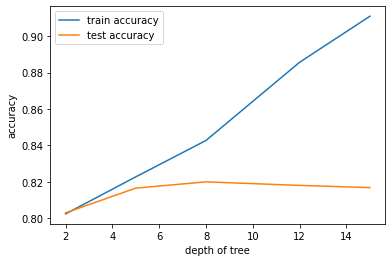

In [ ]:
from sklearn.model_selection import GridSearchCV


# create Randomforest model with Gridsearch parameters
model1 = RandomForestClassifier()
parameter = {'max_depth': [2, 5, 8, 12, 15]}
clf = GridSearchCV(model1, parameter, cv=3, verbose=3, return_train_score=True)
clf.fit(X_train, y_train)
print()
print()


# extract train and test accuracy from Grid search CV
train_acc = clf.cv_results_['mean_train_score']
test_acc = clf.cv_results_['mean_test_score']


# plot train and test accuracy
x = parameter['max_depth']
plt.plot(x, train_acc, label='train accuracy')
plt.plot(x, test_acc, label='test accuracy')
plt.xlabel('depth of tree')
plt.ylabel("accuracy")
plt.legend()
plt.show()


## Observation

## As depth of tree increses then model overfits the training data as accuracy on train data is increased
## Because of overfitting model is not generalizing on test data as accuracy on test data is not increased after depth = 8.

## Tuning n estimators 

Fitting 3 folds for each of 5 candidates, totalling 15 fits
[CV 1/3] END n_estimators=2;, score=(train=0.909, test=0.785) total time=   0.1s
[CV 2/3] END n_estimators=2;, score=(train=0.910, test=0.782) total time=   0.1s
[CV 3/3] END n_estimators=2;, score=(train=0.908, test=0.786) total time=   0.1s
[CV 1/3] END n_estimators=10;, score=(train=0.981, test=0.807) total time=   0.5s
[CV 2/3] END n_estimators=10;, score=(train=0.981, test=0.802) total time=   0.5s
[CV 3/3] END n_estimators=10;, score=(train=0.980, test=0.811) total time=   0.5s
[CV 1/3] END n_estimators=50;, score=(train=0.999, test=0.813) total time=   2.6s
[CV 2/3] END n_estimators=50;, score=(train=1.000, test=0.812) total time=   2.6s
[CV 3/3] END n_estimators=50;, score=(train=0.999, test=0.815) total time=   2.5s
[CV 1/3] END n_estimators=100;, score=(train=1.000, test=0.813) total time=   5.1s
[CV 2/3] END n_estimators=100;, score=(train=1.000, test=0.814) total time=   5.0s
[CV 3/3] END n_estimators=100;, score=(

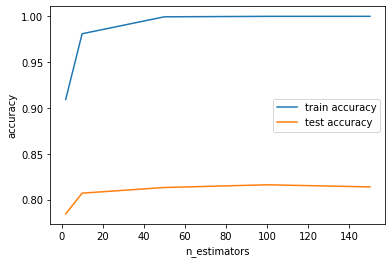

In [ ]:
# create Randomforest model with Gridsearch parameters
model1 = RandomForestClassifier()
parameter = {'n_estimators': [2, 10, 50, 100, 150]}
clf = GridSearchCV(model1, parameter, cv=3, verbose=3, return_train_score=True)
clf.fit(X_train, y_train)
print()
print()


# extract train and test accuracy from Grid search CV
train_acc = clf.cv_results_['mean_train_score']
test_acc = clf.cv_results_['mean_test_score']


# plot train and test accuracy
x = parameter['n_estimators']
plt.plot(x, train_acc, label='train accuracy')
plt.plot(x, test_acc, label='test accuracy')
plt.xlabel('n_estimators')
plt.ylabel("accuracy")
plt.legend()
plt.show()


## Observation

## As No. tree increses then accuracy on train data remains the same after n_estimator = 60
## Model generalizing well on test data till n_estimator=60 after that there is not much benifit in accuracy to increasing the no. of trees beyond 60.

# Tuning more Hyperparamters

In [ ]:
# create Randomforest model with Gridsearch parameters
model1 = RandomForestClassifier()
parameter = {'max_depth': [2, 5, 8], 'min_samples_leaf': [1, 3, 5], 'n_estimators': [2, 5, 8], 'min_samples_split': [2, 4, 6, 8], 'max_features': ['sqrt', 'log2']}
clf = GridSearchCV(model1, parameter, cv=3, verbose=3, return_train_score=True)
clf.fit(X_train, y_train)

Fitting 3 folds for each of 216 candidates, totalling 648 fits
[CV 1/3] END max_depth=2, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=2;, score=(train=0.807, test=0.806) total time=   0.0s
[CV 2/3] END max_depth=2, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=2;, score=(train=0.796, test=0.796) total time=   0.3s
[CV 3/3] END max_depth=2, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=2;, score=(train=0.818, test=0.822) total time=   0.0s
[CV 1/3] END max_depth=2, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=5;, score=(train=0.800, test=0.799) total time=   0.1s
[CV 2/3] END max_depth=2, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=5;, score=(train=0.794, test=0.792) total time=   0.1s
[CV 3/3] END max_depth=2, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=5;, score=(train=0.799, test=0.801) total time=   0.1s
[CV 1/3] END 

GridSearchCV(cv=3, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [2, 5, 8],
                         'max_features': ['sqrt', 'log2'],
                         'min_samples_leaf': [1, 3, 5],
                         'min_samples_split': [2, 4, 6, 8],
                         'n_estimators': [2, 5, 8]},
             return_train_score=True, verbose=3)

## Train model with best params

In [ ]:
# get best params
best_model = clf.best_params_


# extract best prarams from dictionary
d = best_model['max_depth']
mf = best_model['max_features']
msl = best_model['min_samples_leaf']
mss = best_model['min_samples_split']
est = best_model['n_estimators']


# create model with best params
final_model = RandomForestClassifier(max_depth=d, max_features=mf, min_samples_leaf=msl, min_samples_split=mss, n_estimators=est)


# train model
final_model.fit(X_train, y_train)


# test model
y_pred_final = final_model.predict(X_test)


# print accuracy score
print("Accuracy on best params model is :", accuracy_score(y_test, y_pred_final))
print()
print()

# print classification report
from sklearn.metrics import classification_report
print("classification report")
print()
print(classification_report(y_test, y_pred_final))

Accuracy on best params model is : 0.8215


classification report

              precision    recall  f1-score   support

           0       0.84      0.96      0.89      4678
           1       0.69      0.34      0.46      1322

    accuracy                           0.82      6000
   macro avg       0.77      0.65      0.67      6000
weighted avg       0.81      0.82      0.80      6000



# Q3 Naive Bayes Classifier

## Load the dataset

In [ ]:
df = pd.read_csv('iris.data', header=None)
df.columns = ['Sepal Length', 'Sepal Width', 'Petal Length', 'Petal Width', 'class']
df.head()

,Sepal Length,Sepal Width,Petal Length,Petal Width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
# check shape of dataset
df.shape

(150, 5)

In [ ]:
# check columns data type 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Sepal Length  150 non-null    float64
 1   Sepal Width   150 non-null    float64
 2   Petal Length  150 non-null    float64
 3   Petal Width   150 non-null    float64
 4   class         150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [ ]:
# check for null values
df.isna().sum()

Sepal Length    0
Sepal Width     0
Petal Length    0
Petal Width     0
class           0
dtype: int64

In [ ]:
# removce duplicate rows
df = df.drop_duplicates(keep='first')
df.duplicated().sum()

0

## Scale the data

In [ ]:
scaler = StandardScaler()
scaled_data = pd.DataFrame(scaler.fit_transform(df.iloc[:, :-1]), columns=df.columns[:-1])
y = pd.DataFrame(df.iloc[:, -1], columns=['class'])   
display(scaled_data.head())
print(scaled_data.shape)

,Sepal Length,Sepal Width,Petal Length,Petal Width
0,-0.915509,1.019971,-1.357737,-1.3357
1,-1.157560,-0.128082,-1.357737,-1.3357
2,-1.399610,0.331139,-1.414778,-1.3357
3,-1.520635,0.101529,-1.300696,-1.3357
4,-1.036535,1.249582,-1.357737,-1.3357


(147, 4)


## Split the data obtain train and test


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

X_train, X_test, y_train, y_test = train_test_split(scaled_data, y, test_size=0.2, random_state=33)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(117, 4)
(30, 4)
(117, 1)
(30, 1)


## Create Gaussian Naive Bayes Model

In [ ]:
# import Naive Bayes model
from sklearn.naive_bayes import GaussianNB


# create model and fit data
model = GaussianNB()
model.fit(X_train, y_train.to_numpy().reshape(-1, 1))


# predict on test data
y_pred = model.predict(X_test)
print("Accuracy of Model using Gaussian NB is :", accuracy_score(y_test, y_pred))

Accuracy of Model using Gaussian NB is : 0.9666666666666667


# Q4 PCA and k-means clustering

In [ ]:
# read dataset
df = pd.read_excel("Online Retail.xlsx")
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [ ]:
# check the shape of dataframe
df.shape

(541909, 8)

In [ ]:
# random sampling of dataset because of resource constraint on my PC
df1 = df.sample(80000)
print(df1.shape)
df1.head()

(80000, 8)


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
434153,574033,22766,PHOTO FRAME CORNICE,8,2011-11-02 12:44:00,2.95,16558.0,United Kingdom
111887,545838,22566,FELTCRAFT HAIRBAND PINK AND PURPLE,1,2011-03-07 13:33:00,0.85,14606.0,United Kingdom
307454,563917,22659,LUNCH BOX I LOVE LONDON,2,2011-08-21 13:46:00,1.95,14572.0,United Kingdom
512910,579520,21843,RED RETROSPOT CAKE STAND,1,2011-11-29 18:14:00,10.95,12748.0,United Kingdom
172032,551516,22474,SPACEBOY TV DINNER TRAY,1,2011-05-01 11:10:00,4.95,14800.0,United Kingdom


In [ ]:
# check info of dataset
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 80000 entries, 434153 to 196777
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   InvoiceNo    80000 non-null  object        
 1   StockCode    80000 non-null  object        
 2   Description  79803 non-null  object        
 3   Quantity     80000 non-null  int64         
 4   InvoiceDate  80000 non-null  datetime64[ns]
 5   UnitPrice    80000 non-null  float64       
 6   CustomerID   59746 non-null  float64       
 7   Country      80000 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 5.5+ MB


In [ ]:
# check for missing values
df1.isna().sum()

InvoiceNo          0
StockCode          0
Description      197
Quantity           0
InvoiceDate        0
UnitPrice          0
CustomerID     20254
Country            0
dtype: int64

In [ ]:
# check dataset statistics
df1.describe()

,Quantity,UnitPrice,CustomerID
count,80000.000000,80000.000000,59746.000000
mean,9.295137,4.474660,15271.607137
std,45.121673,75.299433,1713.583932
min,-5368.000000,0.000000,12347.000000
25%,1.000000,1.250000,13908.000000
50%,3.000000,2.080000,15129.000000
75%,10.000000,4.130000,16775.000000
max,3114.000000,16888.020000,18287.000000


## Feature Engineering

In [ ]:
# remove nergative quantity
df1 = df1[(df1['Quantity']>0)]

In [ ]:
# compute amount
df1['Amount'] = df1['Quantity']*df1['UnitPrice']
df1.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Amount
434153,574033,22766,PHOTO FRAME CORNICE,8,2011-11-02 12:44:00,2.95,16558.0,United Kingdom,23.60
111887,545838,22566,FELTCRAFT HAIRBAND PINK AND PURPLE,1,2011-03-07 13:33:00,0.85,14606.0,United Kingdom,0.85
307454,563917,22659,LUNCH BOX I LOVE LONDON,2,2011-08-21 13:46:00,1.95,14572.0,United Kingdom,3.90
512910,579520,21843,RED RETROSPOT CAKE STAND,1,2011-11-29 18:14:00,10.95,12748.0,United Kingdom,10.95
172032,551516,22474,SPACEBOY TV DINNER TRAY,1,2011-05-01 11:10:00,4.95,14800.0,United Kingdom,4.95


In [ ]:
# check monetory of each customer
rfm_m = df1.groupby('CustomerID')['Amount'].sum()
rfm_m = rfm_m.reset_index()
rfm_m.head()

,CustomerID,Amount
0,12347.0,572.34
1,12348.0,203.52
2,12349.0,274.50
3,12350.0,40.20
4,12352.0,172.10


In [ ]:
# check customer frequency for buying products
rfm_f = df1.groupby('CustomerID')['InvoiceNo'].count()
rfm_f = rfm_f.reset_index()
rfm_f.columns = ['CustomerID', 'Frequency']
print(rfm_f.head())

   CustomerID  Frequency
0     12347.0         29
1     12348.0          3
2     12349.0         13
3     12350.0          2
4     12352.0          8


In [ ]:
# merge dataframes
rfm = pd.merge(rfm_m, rfm_f, on='CustomerID', how='inner')
rfm.head()

,CustomerID,Amount,Frequency
0,12347.0,572.34,29
1,12348.0,203.52,3
2,12349.0,274.50,13
3,12350.0,40.20,2
4,12352.0,172.10,8


In [ ]:
# chenge format of datetime and extract max date
df1['InvoiceDate'] = pd.to_datetime(df1['InvoiceDate'],format='%d-%m-%Y %H:%M')
max_date = max(df1['InvoiceDate'])
max_date

Timestamp('2011-12-09 12:50:00')

In [ ]:
# find differnce of days between two product purchase
df1['Difference_days'] = (max_date - df1['InvoiceDate']).dt.days
df1['Difference_days'].head()

434153     37
111887    276
307454    109
512910      9
172032    222
Name: Difference_days, dtype: int64

In [ ]:
# group customers using difference days
rfm_p = df1.groupby('CustomerID')['Difference_days'].min()
rfm_p = rfm_p.reset_index()
rfm_p.head()

,CustomerID,Difference_days
0,12347.0,39
1,12348.0,74
2,12349.0,18
3,12350.0,309
4,12352.0,35


In [ ]:
# merge two detaframe
rfm = pd.merge(rfm, rfm_p, on='CustomerID', how='inner')
rfm.head()

,CustomerID,Amount,Frequency,Difference_days
0,12347.0,572.34,29,39
1,12348.0,203.52,3,74
2,12349.0,274.50,13,18
3,12350.0,40.20,2,309
4,12352.0,172.10,8,35


In [ ]:
# extract  on. of qunaity customer wise
rfm_n = df1.groupby('CustomerID')['Quantity'].count()
rfm_n = rfm_n.reset_index()
rfm_n.columns=['CustomerID','TotalQuantity']
rfm_n.head()

,CustomerID,TotalQuantity
0,12347.0,29
1,12348.0,3
2,12349.0,13
3,12350.0,2
4,12352.0,8


In [ ]:
# merge dataframes
rfm = pd.merge(rfm, rfm_n, on='CustomerID', how='inner')
rfm.head()

,CustomerID,Amount,Frequency,Difference_days,TotalQuantity
0,12347.0,572.34,29,39,29
1,12348.0,203.52,3,74,3
2,12349.0,274.50,13,18,13
3,12350.0,40.20,2,309,2
4,12352.0,172.10,8,35,8


## Scale the data


In [ ]:
# apply standard scaler
rfm_scale = pd.DataFrame(StandardScaler().fit_transform(rfm), columns=rfm.columns)
rfm_scale.head()

,CustomerID,Amount,Frequency,Difference_days,TotalQuantity
0,-1.707593,0.199220,0.412177,-0.543719,0.412177
1,-1.707012,-0.084795,-0.336965,-0.196680,-0.336965
2,-1.706432,-0.030136,-0.048833,-0.751942,-0.048833
3,-1.705851,-0.210562,-0.365778,2.133436,-0.365778
4,-1.704690,-0.108991,-0.192899,-0.583380,-0.192899


## Apply PCA

In [ ]:
from sklearn.decomposition import PCA

# fit data and reduce dimentionality
n_comp = 0


# find component
for x in range(1, 4):
  pca = PCA(n_components=x)
  pca.fit(rfm_scale)
  rfm_scale1 = pca.transform(rfm_scale)
  if sum(pca.explained_variance_ratio_) > 0.85:
    n_comp = x
    break
    

print("No. of principal component that retain 85% of variance is :", n_comp)
print()
display(rfm_scale1[:5])

No. of principal component that retain 85% of variance is : 3



array([[ 0.73220683, -1.72211363, -0.28157605],
       [-0.39639583, -1.72874832, -0.17767074],
       [ 0.11174904, -1.7513036 , -0.63517696],
       [-1.02188897, -1.57972833,  2.05203497],
       [-0.13899285, -1.74417328, -0.5205951 ]])

## Apply k-means and find optimal k using elbow method

In [ ]:
# import kmeans cluster
from sklearn.cluster import KMeans


# find k with elbow method
wcss_error = []
for k in range(1, 20):
  model = KMeans(n_clusters=k, init='k-means++', random_state=42)
  model.fit(rfm_scale1)
  wcss_error.append(model.inertia_)

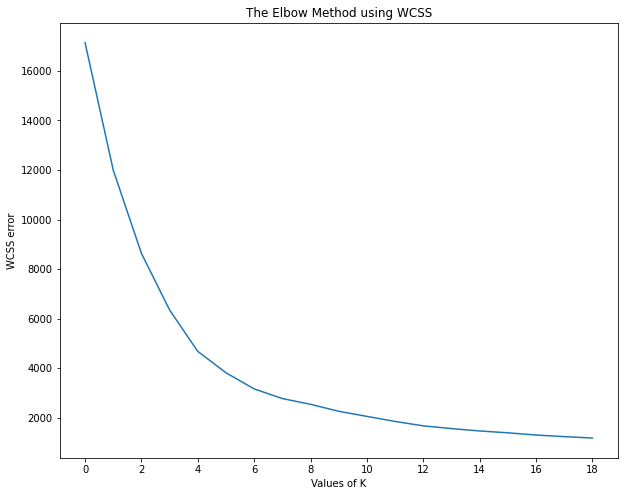

In [ ]:
# plot the elbow method
plt.figure(figsize=(10, 8))
plt.plot(range(len(wcss_error)), wcss_error)
plt.xlabel('Values of K')
plt.ylabel('WCSS error')
plt.xticks([x for x in range(0, 20, 2)])
plt.title('The Elbow Method using WCSS')
plt.show()

In [ ]:
# run kmeans on optimal value of k
model1 = KMeans(n_clusters=4, init='k-means++', random_state=42)
model1.fit(rfm_scale1)
label = model1.fit_predict(rfm_scale1)
# rfm_scale1['label'] = label

In [ ]:
rfm_scale1

array([[ 0.73220683, -1.72211363, -0.28157605],
       [-0.39639583, -1.72874832, -0.17767074],
       [ 0.11174904, -1.7513036 , -0.63517696],
       ...,
       [-0.36186673,  1.66571689, -1.07375521],
       [ 3.7147342 ,  1.80191244, -0.27817302],
       [-0.17055567,  1.69631723, -0.67288661]])

In [ ]:
rfm_final = pd.DataFrame(rfm_scale1, columns=['PC1', 'PC2', 'PC3'])
rfm_final['label'] = model1.labels_
rfm_final.head()    

,PC1,PC2,PC3,label
0,0.732207,-1.722114,-0.281576,3
1,-0.396396,-1.728748,-0.177671,3
2,0.111749,-1.751304,-0.635177,3
3,-1.021889,-1.579728,2.052035,1
4,-0.138993,-1.744173,-0.520595,3


## Visulizing Clusters

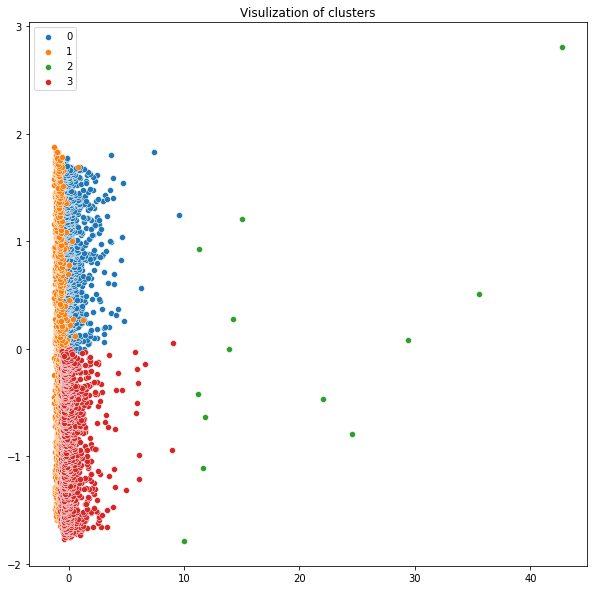

In [ ]:
plt.figure(figsize=(10,10))
for i in np.unique(label):
    sns.scatterplot(rfm_scale1[label == i , 0] , rfm_scale1[label == i , 1] , label = i)
plt.legend()
plt.title("Visulization of clusters")
plt.show()

# Visulize cluster with first 2 Principal component

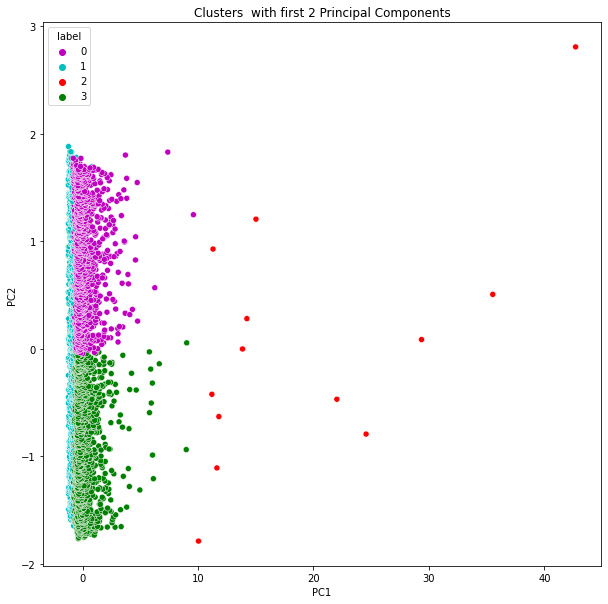

In [ ]:
plt.figure(figsize=(10,10))
sns.scatterplot(rfm_final['PC1'] , rfm_final['PC2'], hue=rfm_final['label'], palette=['m','c','r','g'])
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("Clusters  with first 2 Principal Components")
plt.show()